<a href="https://colab.research.google.com/github/Teja0709/Boston_House_Prices_Using_Regression_Techniques/blob/main/Boston_House_Prices_Using_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**




In [50]:
# The dataset is loaded from a CSV file into a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/boston.csv")


In [51]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**Initial Data Inspection**

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [53]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [54]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Feature and Target Separation**

In [55]:
#We separate the dataset into:
#Features (X) → input variables
#Target (y) → house prices

from sklearn.model_selection import train_test_split

x=data.drop('MEDV',axis=1)
y=data['MEDV']

**Train-Test Split**

In [56]:
#The dataset is split into training and testing sets to evaluate model generalization
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Exploratory Data Analysis (EDA)**

In [57]:
#Histograms help understand the distribution of each feature
train_data=x_train.join(y_train)

In [58]:
train_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277.0,18.6,385.81,9.38,28.1
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,50.0
275,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254.0,17.6,396.90,2.98,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666.0,20.2,304.21,19.31,13.0
289,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293.0,16.6,371.72,9.51,24.8
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80,16.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

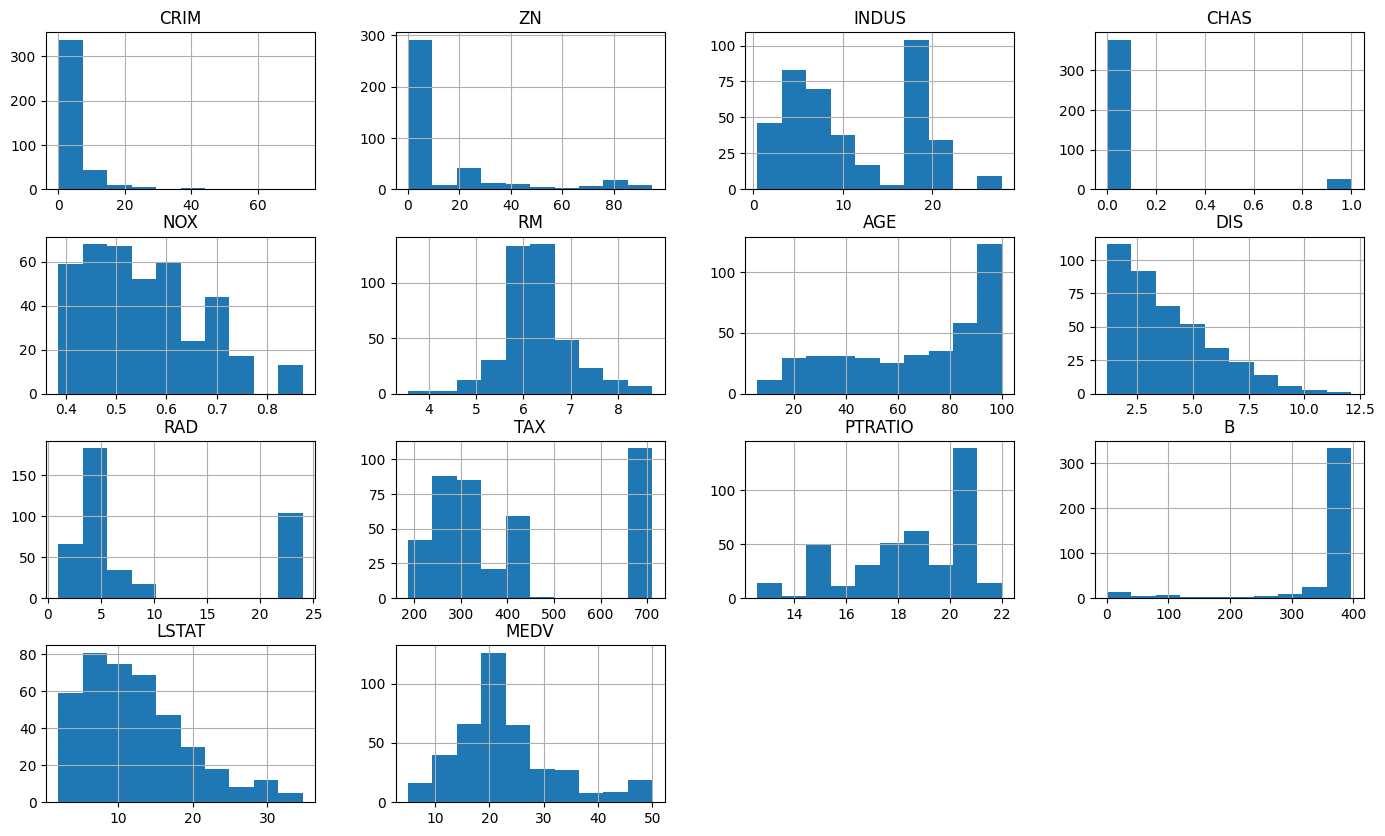

In [59]:
train_data.hist(figsize=(17,10))

<Axes: >

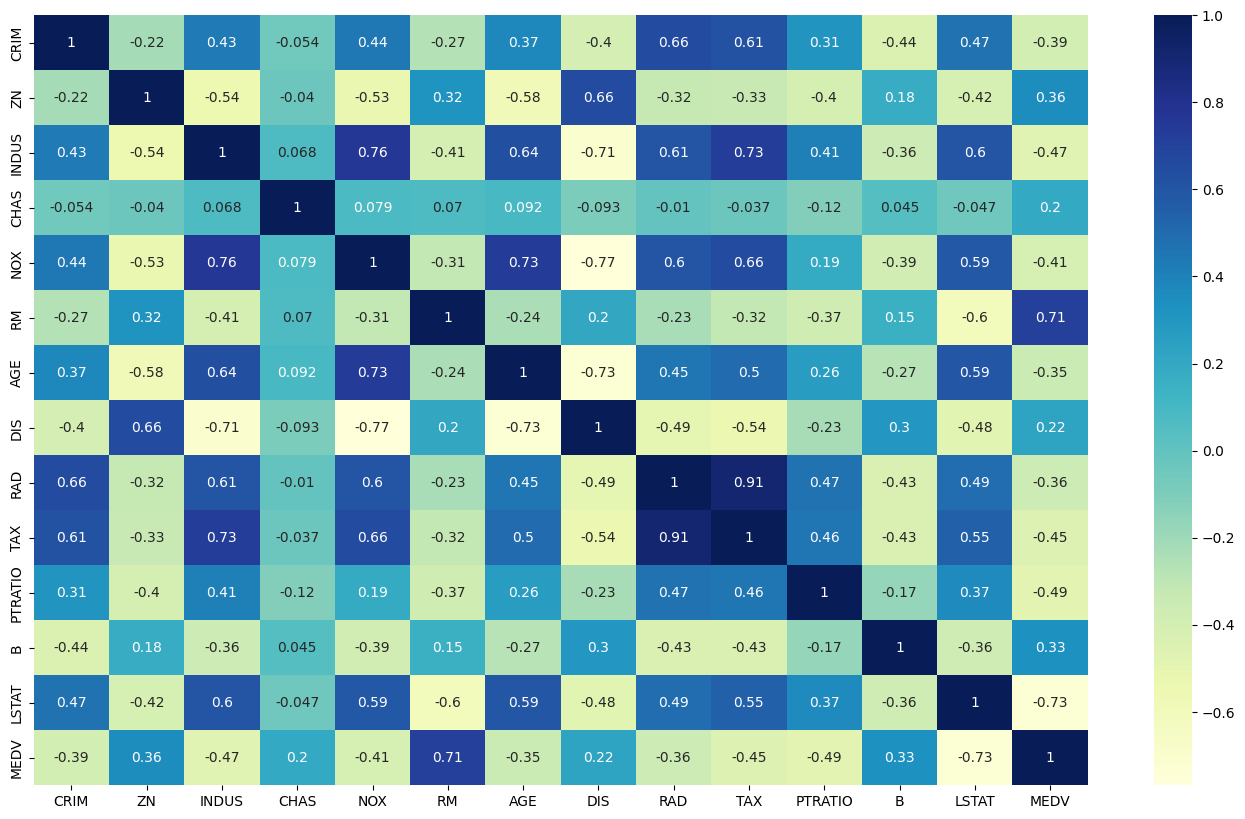

In [60]:
#A heatmap is used to observe relationships between variables
plt.figure(figsize=(17,10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

**Feature Scaling**

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Linear Regression Model

In [62]:
#Model Training
#Linear Regression is used as a baseline model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [63]:
lin_reg.fit(x_train_scaled, y_train)


LinearRegression()

In [64]:
#Print the predictions on our test data
y_pred_lr = lin_reg.predict(x_test_scaled)
print(y_pred_lr)

[ 2.22125448e+01  3.73774985e+01  3.75073724e+01  1.61623762e+01
  2.90306704e+01  3.40392875e+01  2.43806419e+01  2.04668441e+01
  2.07037211e+01  2.39839188e+01  1.56390994e+01  1.70831622e+01
  2.21524290e+01  3.32402567e+01  1.61134445e+01  1.98584642e+01
  1.32517939e+01  2.44752362e+01  2.87106498e+01  1.40651166e+01
  3.11054472e+01  2.08316653e+01  2.22001436e+01  1.48741068e+01
  1.87493939e+01  1.34737293e+01  1.74039121e+01  2.43480572e+01
  1.36878237e+01  3.39898098e+01  2.05900453e+01  3.17194809e+01
  2.32886144e+01  3.37626497e+01  2.11556903e+01  2.66639006e+00
  2.52018143e+01  1.37363849e+01  1.67708714e+01  3.30329614e+01
  2.23840738e+01  3.10596915e+01  1.39688771e+01  2.61504130e+01
  2.84683461e+01  1.98576568e+01  2.12277717e+01  2.09799719e+01
  2.49689075e+01  1.65946651e+01  2.36457271e+01  1.16045180e+01
  4.07783272e+01  2.67847144e+01  2.27466179e+01  2.86307980e+01
  2.51520838e+01  2.02817774e+01  2.62582885e+01  3.95607908e+01
  2.66760767e+01  1.44599

In [65]:
#Print the actual values
print(y_test)

36     20.0
273    35.2
161    50.0
455    14.1
158    24.3
       ... 
57     31.6
321    23.1
344    31.2
25     13.9
143    15.6
Name: MEDV, Length: 102, dtype: float64


In [66]:
#check model performance/accuracy using Mean Squared Error ,sklearn.metrics, r square
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression RMSE: 4.690098464813034
Linear Regression R2: 0.6562171814522169


In [68]:
#Linear Regression Coefficients
#This shows how each feature affects house prices
coefficients = pd.DataFrame(
    lin_reg.coef_,
    x.columns,
    columns=["Coefficient"]
)

coefficients


,Coefficient
CRIM,-0.839091
ZN,1.099611
INDUS,0.227619
CHAS,0.976293
NOX,-2.110114
RM,2.958730
AGE,0.140972
DIS,-3.162829
RAD,3.013013
TAX,-2.212641


**Random Forest Regressor**

In [69]:
from sklearn.ensemble import RandomForestRegressor



In [70]:
#Random Forest is used to capture non-linear relationships
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)


In [71]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


In [72]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)


Random Forest RMSE: 4.4837514640283604
Random Forest R2: 0.6858020769266915


**Model Comparison**

In [73]:
#We compare both models to select the best-performing one
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

comparison


,Model,RMSE,R2 Score
0,Linear Regression,4.690098,0.656217
1,Random Forest,4.483751,0.685802


**Feature Importance Analysis**



In [74]:
#This shows which features most influence house prices
importance = pd.Series(
    rf.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

importance


,0
RM,0.554018
LSTAT,0.252874
DIS,0.080169
CRIM,0.034010
NOX,0.019301
TAX,0.014574
B,0.012117
PTRATIO,0.011114
AGE,0.010560
INDUS,0.006143
